In [133]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [8]:
# viewing data

df = pd.read_csv(r'C:\Users\Patrick\Desktop\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [12]:
# dropping rows with missing values

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [13]:
df = df.dropna()

In [14]:
# converting data types from floats to integers

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [19]:
# searching for duplicate entries

df.duplicated().sum()

0

In [20]:
# correcting year column (year did not match the release date in some cases)

df['correct_year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int) 

In [138]:
# sorting movies by highest grossing

df.sort_values(by = ['gross'], inplace = False, ascending = False).head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,2019


Text(0, 0.5, 'Gross Earnings')

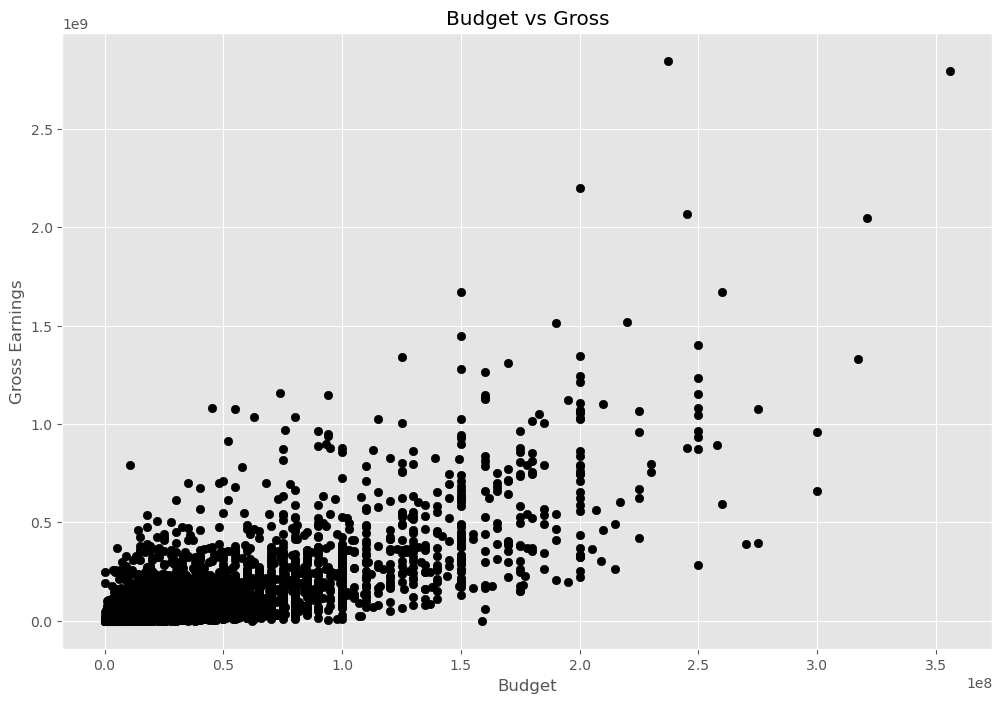

In [41]:
# visualizing data based on budget and gross earnings 

plt.scatter(x = df['budget'], y = df['gross'], color = 'k')

plt.title('Budget vs Gross')

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

In [42]:
# looking for correlations strongly related to gross earnings

df.corr(numeric_only = True, method = 'pearson')

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(0.5, 1.0, 'Correlation Heat Map')

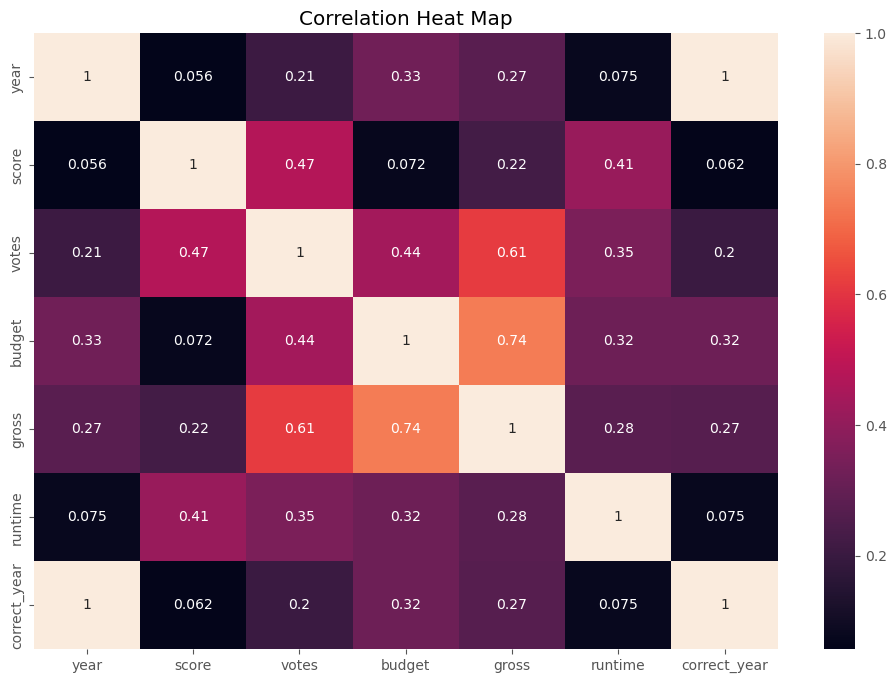

In [46]:
# budget and votes seem to have the highest correlation to gross earnings

sns.heatmap(df.corr(numeric_only = True, method = 'pearson'), annot=True)
plt.title("Correlation Heat Map")

Text(0, 0.5, 'Gross Earnings')

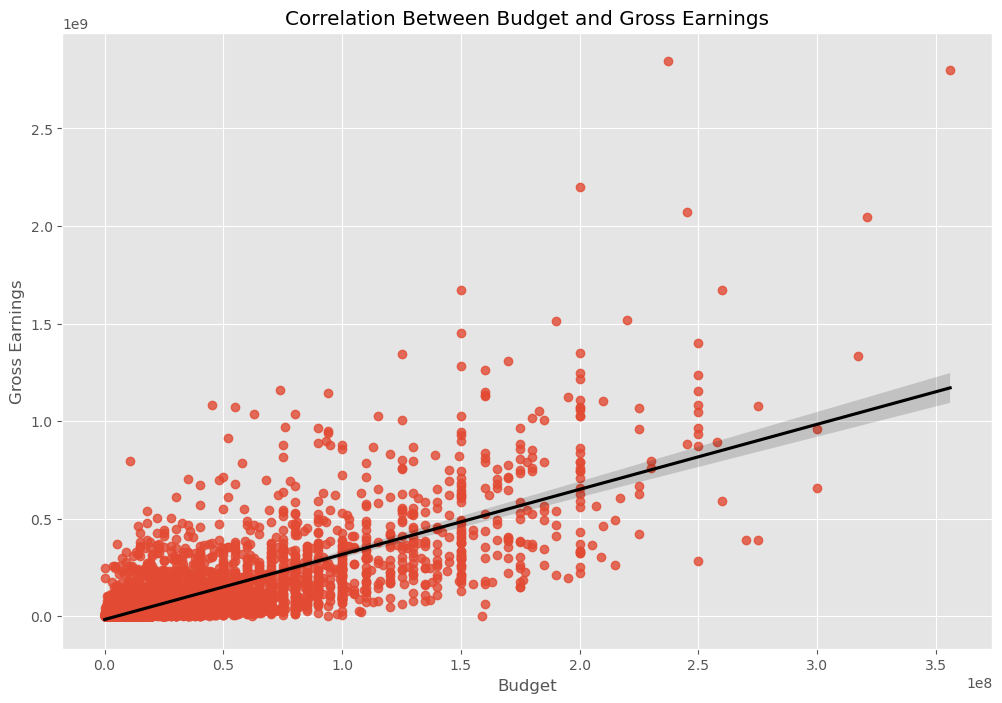

In [43]:
sns.regplot(x = 'budget', y = 'gross', data = df, line_kws = {'color':'black'})

plt.title('Correlation Between Budget and Gross Earnings')

plt.xlabel('Budget')

plt.ylabel('Gross Earnings')

Text(0, 0.5, 'Gross Earnings')

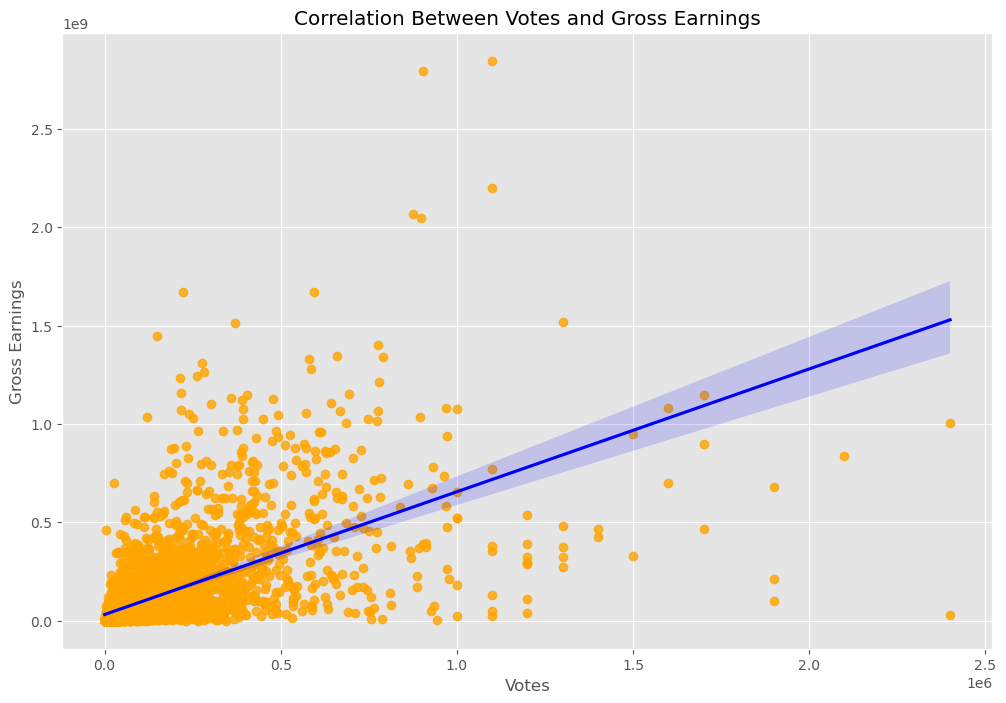

In [45]:
sns.regplot(x ='votes', y = 'gross', data = df, scatter_kws = {'color':'orange'}, line_kws = {'color':'blue'})
plt.title('Correlation Between Votes and Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')

Text(0, 0.5, 'Gross Earnings')

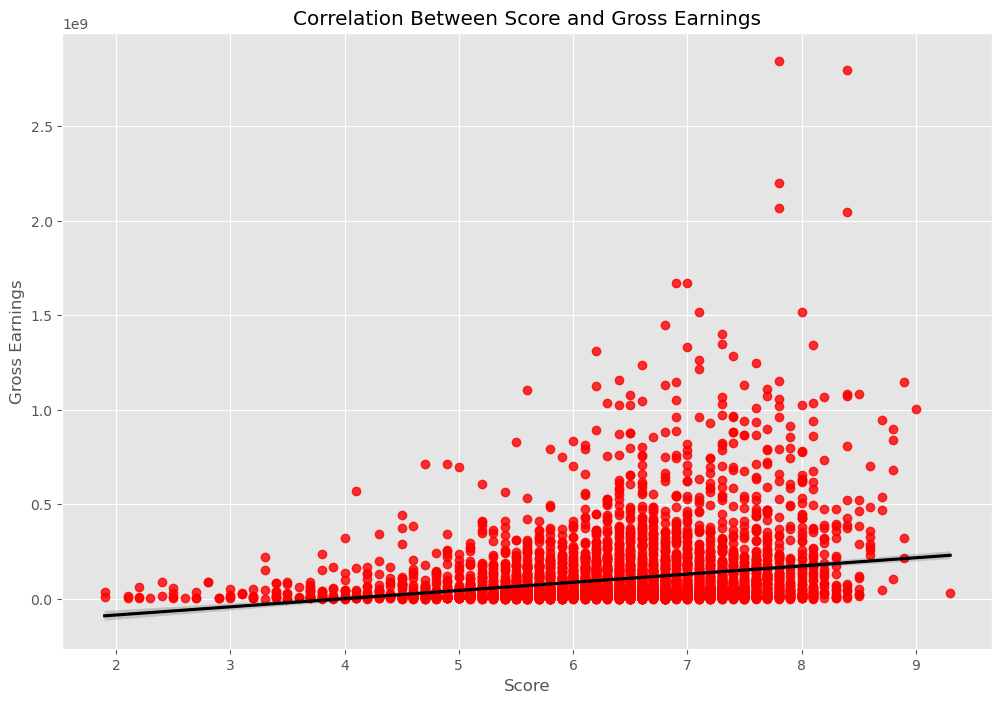

In [50]:
# also wanted to visualize the correlation between score and gross earnings since score is also a numeric value

sns.regplot(x ='score', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'black'})
plt.title('Correlation Between Score and Gross Earnings')
plt.xlabel('Score')
plt.ylabel('Gross Earnings')

In [53]:
# companies with the highest gross earnings

company_max_gross = df.groupby('company')[['gross']].sum()

top_10_companies = company_max_gross.sort_values('gross', ascending = False)[:10]

top_10_companies

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


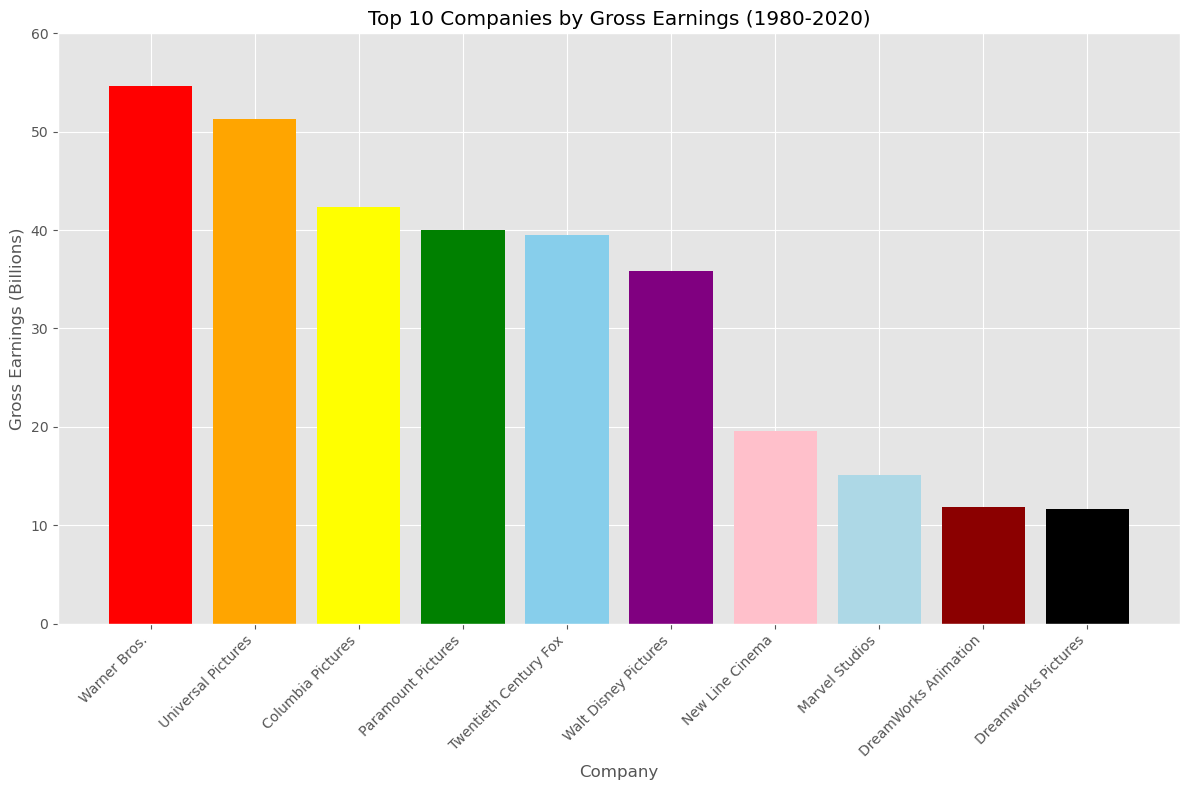

In [66]:
top_companies = pd.DataFrame({'gross': top_10_companies['gross']}).reset_index()

plt.figure(figsize=(12, 8))

plt.bar(top_companies['company'], top_companies['gross'], color = ['red', 'orange', 'yellow', 'green', 'skyblue', 
                                                                   'purple', 'pink', 'lightblue', 'darkred', 'black'])

plt.xticks(rotation=45, ha='right', fontsize = 10) 

plt.xlabel('Company')

plt.ylabel('Gross Earnings (Billions)')

plt.title('Top 10 Companies by Gross Earnings (1980-2020)')

# y-axis = billions

plt.yticks(plt.gca().get_yticks(), ['{:,.0f}'.format(x/1000000000) for x in plt.gca().get_yticks()])

plt.tight_layout()

In [93]:
# highest grossing genres

top_genres = df.groupby('genre')[['gross']].sum()
top_8_genres = top_genres.sort_values('gross', ascending = False)[:8]
top_8_genres

,gross
genre,
Action,237752868767
Comedy,88514817620
Animation,77865909110
Drama,52098564769
Adventure,43578711908
Crime,20017662162
Biography,19093930296
Horror,14261055032


Text(0.5, 1.0, 'Top 8 Genres by Gross Earnings')

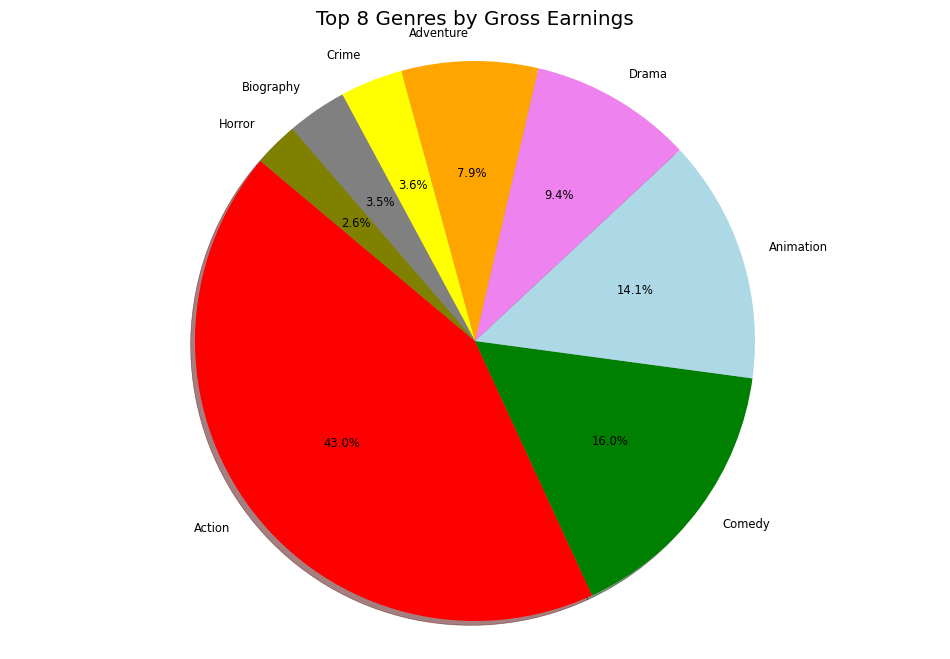

In [130]:
colors = ['red', 'green', 'lightblue', 'violet', 'orange', 'yellow', 'grey', 'olive']

plt.pie(top_8_genres['gross'], labels = top_8_genres.index, autopct = '%1.1f%%',
        shadow = {'ox': -0.02, 'edgecolor': 'none', 'shade': 0.1},
        textprops = {'size': 'smaller'}, radius = 1.8, 
        startangle = 140, colors = colors)

plt.axis('equal')

plt.title('Top 8 Genres by Gross Earnings')
